# Part II - Effects of Categorical and Numerical Characteristics on Used Car Prices 
## by Theresa Sunday


## Investigation Overview


> In this investigation, I wanted to look at the characteristics of cars that could be used to predict their prices and the possiblity of them being sold or not. The main focus is the mileage, engine power, max engine power ,transmission, year and fuel .


## Dataset Overview

> The dataset was gotten from Kaggle.There are 7906 rows and 18 columns in the dataset. Most of the variables are categorical in nature with 'selling_price', 'km_driven', 'mileage', 'engine' and 'max_power' columns as numerical.The main features and target of the dataset is the 'sold' and 'selling_price' column which tells us whether a used car is sold or not and its selling price respectively. Outliers in the dataset were removed from the numerical columns and the dataset reduced to 5877 rows and 18 columns.


In [1]:
# importing all packages and setting plots to be embedded inline
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

%matplotlib inline

# suppress warnings from final output
import warnings
warnings.simplefilter("ignore")

In [2]:
# load in the dataset into a pandas dataframe
df=pd.read_csv('Cleaned_data.csv')
df.sample()

,Sales_ID,name,year,selling_price,km_driven,Region,State or Province,City,fuel,seller_type,transmission,owner,mileage,engine,max_power,torque,seats,sold
5639,7810,Chevrolet,2009,145000,30000,West,Colorado,Grand Junction,Petrol,Individual,Manual,First_Owner,18.0,995,62.0,90.3Nm@ 4200rpm,5,N


## Distribution of Used Car Prices

Used car prices in the dataset take on a very large range of values, from about  30,000 dollars to about 1,300,000 dollars at the highest. Plotted on a histogram, the distribution of used car prices takes on a unimodal shape.

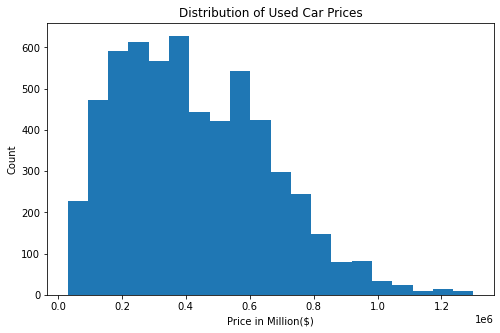

In [3]:

plt.figure(figsize=[8, 5])
plt.hist(data = df, x = 'selling_price', bins = 20)
plt.xlabel('Price in Million($)')
plt.ylabel('Count')
plt.title('Distribution of Used Car Prices');


## Distribution of Sold Cars

> Used cars are either sold or not. How do they compare in this dataset? Do people really buy used cars?

> Only 25% of the used cars in the dataset have been sold with a huge 75% not sold.

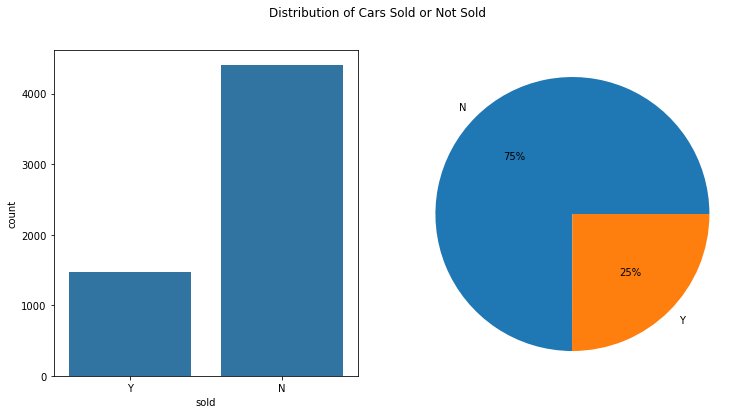

In [4]:
base_color=sns.color_palette()[0]
plt.figure(figsize=[12,6])
plt.subplot(1,2,1)
sns.countplot(data=df, x='sold',color=base_color)
plt.suptitle("Distribution of Cars Sold or Not Sold")

plt.subplot(1,2,2)
sold_count=df.sold.value_counts(normalize=True)
plt.pie(sold_count,labels=sold_count.index ,autopct='%.0f%%');
plt.axis('square');

## Categorical features that affect used car price

Fuel,mode of transmission ,owner and seller are four categorical variables whose relationship we will explain with used car selling prices.

Diesel and Petrol fuelled used cars tended to have higher prices than LPG and CNG fuelled cars. Automatic cars in the dataset were more expensive as compared to manual cars.Indivividual cars tended to have lesser prices than dealer used cars. Direct owners cars i.e first owner cars were more expensive than other owner types.

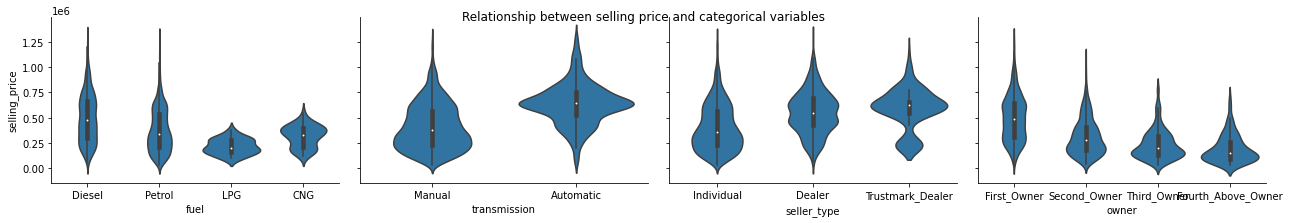

In [5]:
features=[ 'fuel', 'transmission','seller_type','owner']

g = sns.PairGrid(data = df, y_vars = ['selling_price'], x_vars = features,
                height = 3, aspect = 1.5)
g.map(sns.violinplot,color=sns.color_palette()[0])
plt.suptitle('Relationship between selling price and categorical variables')
plt.show();

## Numerical features that affect used car price

Very high max engine powers had very high selling prices showing its correlation.Similarly, engine and years also show positive correlation with the selling price.

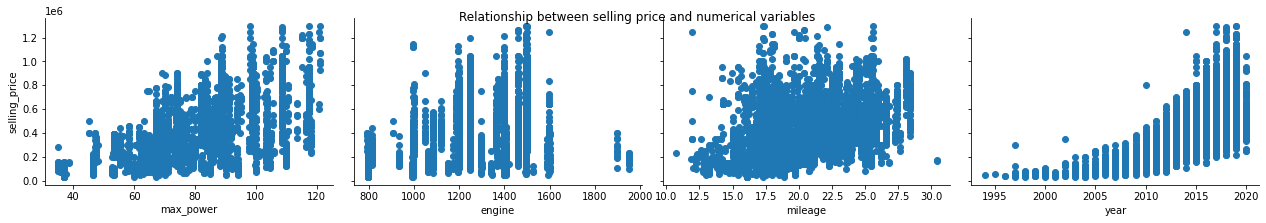

In [6]:
features=[ 'max_power','engine','mileage','year']

g = sns.PairGrid(data = df, y_vars = ['selling_price'], x_vars = features,
                height = 3, aspect = 1.5)
g.map(plt.scatter,color=sns.color_palette()[0])
plt.suptitle('Relationship between selling price and numerical variables')
plt.show();

## Numerical features that affect used car getting sold or not

Cars with higher mileage had a harder time getting sold than cars with lower mileage

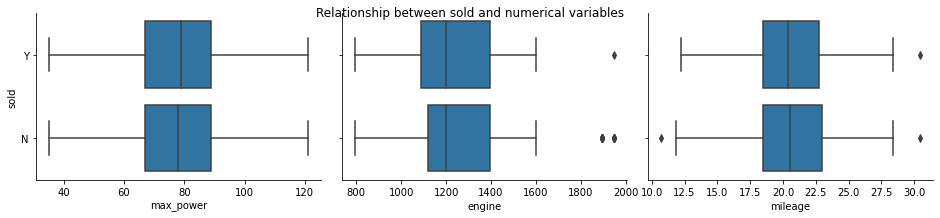

In [7]:
features=[ 'max_power','engine','mileage']

g = sns.PairGrid(data = df, y_vars = ['sold'], x_vars = features,
                height = 3, aspect = 1.5)
g.map(sns.boxplot,color=sns.color_palette()[0])
plt.suptitle('Relationship between sold and numerical variables')
plt.show();

## Categorical features that affect used car getting sold or not

Diesel and petrol fuelled cars had a higher chance of selling than LPG or CNG fuelled cars

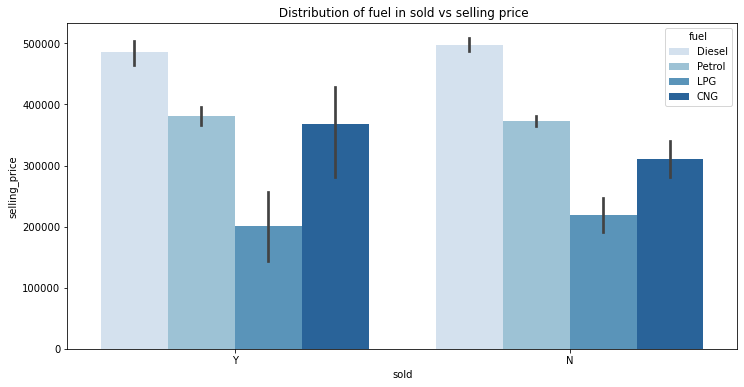

In [8]:
features=[ 'fuel', 'transmission','owner']
def bar(feat):
    plt.figure(figsize=[12,6])
    sns.barplot(data=df,x="sold",y="selling_price",hue=feat,palette="Blues")
    plt.title(f" Distribution of {feat} in sold vs selling price")
    plt.show()


bar('fuel')


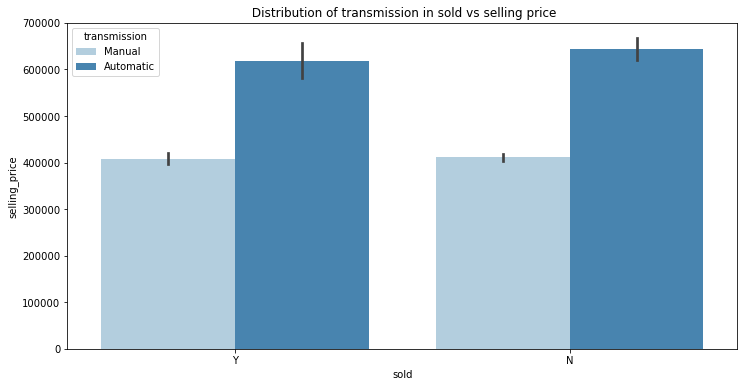

In [9]:
bar('transmission')

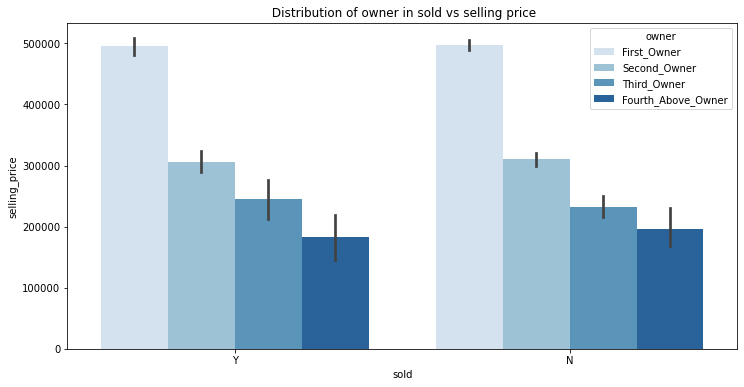

In [10]:
bar('owner')